# Building an aspect-based sentiment analysis algorithm based on syntactic parsing

## Import libraries

In [1]:
import xmltodict
import pprint
from collections import defaultdict
import json
import spacy
from spacy import displacy
from nltk.corpus import stopwords
from textblob import TextBlob
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

stopwords = stopwords.words('english')

In [2]:
#modifying stopwords list so that some negation words are not removed

stopwords = set(stopwords) - set(['but', 'no', 'not', 'too', 'very', 'ain', 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"])

In [3]:
#check if modified correctly

stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'by',
 'can',
 'd',
 'did',
 'do',
 'does',
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'has',
 'have',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'me',
 'more',
 'most',
 'my',
 'myself',
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'she',
 "she's",
 'should',
 "should've",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'under',
 'until',


## Read XML as dictionary

In [4]:
#reading xml as dictionary

with open('Restaurants.xml', 'r', encoding='utf-8') as file:
    my_xml = file.read()

my_dict = xmltodict.parse(my_xml)

#print out the structure of the transformed data
pprint.pprint(my_dict)

OrderedDict([('sentences',
              OrderedDict([('sentence',
                            [OrderedDict([('@id', '3121'),
                                          ('text',
                                           'But the staff was so horrible to '
                                           'us.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         OrderedDict([('@term',
                                                                       'staff'),
                                                                      ('@polarity',
                                                                       'negative'),
                                                                      ('@from',
                                                                       '8'),
                                                                      ('@to',


                                                                        '70')])])])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         [OrderedDict([('@category',
                                                                        'ambience'),
                                                                       ('@polarity',
                                                                        'positive')]),
                                                          OrderedDict([('@category',
                                                                        'price'),
                                                                       ('@polarity',
                                                                        'positive')])])]))]),
                             OrderedDict([('@id', '3070'),
                             

                                                                        'positive'),
                                                                       ('@from',
                                                                        '6'),
                                                                       ('@to',
                                                                        '10')]),
                                                          OrderedDict([('@term',
                                                                        'menu'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                                                        '22'),
                                                                       ('@to',
                         

                                                                        'positive')]),
                                                          OrderedDict([('@category',
                                                                        'ambience'),
                                                                       ('@polarity',
                                                                        'conflict')])])]))]),
                             OrderedDict([('@id', '1574'),
                                          ('text',
                                           'This place is so much fun.'),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'anecdotes/miscellaneous'),
                                                           

                                                                       'table'),
                                                                      ('@polarity',
                                                                       'negative'),
                                                                      ('@from',
                                                                       '41'),
                                                                      ('@to',
                                                                       '46')]))])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'anecdotes/miscellaneous'),
                                                                      ('@polarity',
                          

                                                                      ('@polarity',
                                                                       'neutral'),
                                                                      ('@from',
                                                                       '40'),
                                                                      ('@to',
                                                                       '47')]))])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'service'),
                                                                      ('@polarity',
                                                                       'neutral')]))]))]),
                             Orde

                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '2139'),
                                          ('text',
                                           'We will return many times for this '
                                           'oasis in mid-town.'),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'anecdotes/miscellaneous'),
                                                                      ('@polarity',
                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '2454'),
                                          ('text',
                                           '

                                           'The food was just awful, ATROCIOUS '
                                           'actually.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         OrderedDict([('@term',
                                                                       'food'),
                                                                      ('@polarity',
                                                                       'negative'),
                                                                      ('@from',
                                                                       '4'),
                                                                      ('@to',
                                                                       '8')]))])),
                                          ('aspectCategories',
                        

                                                                        'positive'),
                                                                       ('@from',
                                                                        '10'),
                                                                       ('@to',
                                                                        '17')]),
                                                          OrderedDict([('@term',
                                                                        'prices'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                                                        '32'),
                                                                       ('@to',
                      

                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '841'),
                                          ('text',
                                           'But, nothing stands out about the '
                                           'cooking.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         OrderedDict([('@term',
                                                                       'cooking'),
                                                                      ('@polarity',
                                                                       'neutral'),
                                                                      ('@from',
                                                                       '34'),
                                              

                                                                       'negative')]))]))]),
                             OrderedDict([('@id', '241'),
                                          ('text',
                                           'One of the more authentic '
                                           'Shanghainese restaurants in the US '
                                           'definitely the best in Manhattan '
                                           'Chinatown.'),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'anecdotes/miscellaneous'),
                                                                      ('@polarity',
                                                                       'positive')]))]))]),
            

                                                                        'containers '
                                                                        'for '
                                                                        'condiments'),
                                                                       ('@polarity',
                                                                        'negative'),
                                                                       ('@from',
                                                                        '126'),
                                                                       ('@to',
                                                                        '151')]),
                                                          OrderedDict([('@term',
                                                                        'containers'),
                                                                       ('@polarity',
   

                                                                        '97')])])])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'ambience'),
                                                                      ('@polarity',
                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '2479'),
                                          ('text',
                                           'We visited Bread Bar during '
                                           'January restaurant week and were '
                                           'so pleased with the menu '
                                           'selections and service.'),
                           

                                                                       'neutral')]))]))]),
                             OrderedDict([('@id', '1971'),
                                          ('text',
                                           'The sides were ok and incredibly '
                                           'salty.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         OrderedDict([('@term',
                                                                       'sides'),
                                                                      ('@polarity',
                                                                       'negative'),
                                                                      ('@from',
                                                                       '4'),
                                                   

                                                                        '50')]),
                                                          OrderedDict([('@term',
                                                                        'quality '
                                                                        'of '
                                                                        'food'),
                                                                       ('@polarity',
                                                                        'negative'),
                                                                       ('@from',
                                                                        '80'),
                                                                       ('@to',
                                                                        '95')])])])),
                                          ('aspectCategories',
                                      

                                           OrderedDict([('aspectTerm',
                                                         [OrderedDict([('@term',
                                                                        'food'),
                                                                       ('@polarity',
                                                                        'neutral'),
                                                                       ('@from',
                                                                        '4'),
                                                                       ('@to',
                                                                        '8')]),
                                                          OrderedDict([('@term',
                                                                        'food'),
                                                                       ('@polarity',
                                 

                                           'friendly.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         OrderedDict([('@term',
                                                                       'server'),
                                                                      ('@polarity',
                                                                       'positive'),
                                                                      ('@from',
                                                                       '4'),
                                                                      ('@to',
                                                                       '10')]))])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                           

                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '3575'),
                                          ('text',
                                           'As we were leaving, the couple '
                                           'standing by the door said to '
                                           "another waiter, we're not in a "
                                           'hurry.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         OrderedDict([('@term',
                                                                       'waiter'),
                                                                      ('@polarity',
                                                                       'neutral'),
                                                         

                                           '(if bought by the pound).'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         [OrderedDict([('@term',
                                                                        'appetizing'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                                                        '4'),
                                                                       ('@to',
                                                                        '14')]),
                                                          OrderedDict([('@term',
                                                            

                                                                        'negative')])])]))]),
                             OrderedDict([('@id', '924'),
                                          ('text',
                                           'With the theater 2 blocks away we '
                                           'had a delicious meal in a '
                                           'beautiful room.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         [OrderedDict([('@term',
                                                                        'meal'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                        

                                                         OrderedDict([('@category',
                                                                       'food'),
                                                                      ('@polarity',
                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '2081'),
                                          ('text',
                                           'Yes, the prices are high, but I '
                                           'felt it was worth it.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         OrderedDict([('@term',
                                                                       'prices'),
                                                                      ('@polarity',
                            

                                                                        'fish'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                                                        '33'),
                                                                       ('@to',
                                                                        '37')]),
                                                          OrderedDict([('@term',
                                                                        'rice'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                

                                           OrderedDict([('aspectTerm',
                                                         [OrderedDict([('@term',
                                                                        'Food'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                                                        '0'),
                                                                       ('@to',
                                                                        '4')]),
                                                          OrderedDict([('@term',
                                                                        'pork '
                                                                        'belly'),
                                    

                                           'best pizza restaurant anywhere.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         OrderedDict([('@term',
                                                                       'pizza'),
                                                                      ('@polarity',
                                                                       'positive'),
                                                                      ('@from',
                                                                       '39'),
                                                                      ('@to',
                                                                       '44')]))])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
     

                                           OrderedDict([('aspectCategory',
                                                         [OrderedDict([('@category',
                                                                        'food'),
                                                                       ('@polarity',
                                                                        'positive')]),
                                                          OrderedDict([('@category',
                                                                        'price'),
                                                                       ('@polarity',
                                                                        'negative')])])]))]),
                             OrderedDict([('@id', '870'),
                                          ('text',
                                           'In addition, the food is very good '
                                           'and the

                                                                        '114'),
                                                                       ('@to',
                                                                        '123')]),
                                                          OrderedDict([('@term',
                                                                        'texture'),
                                                                       ('@polarity',
                                                                        'conflict'),
                                                                       ('@from',
                                                                        '74'),
                                                                       ('@to',
                                                                        '81')]),
                                                          OrderedDict([('@term',
                       

                                                                       ('@from',
                                                                        '146'),
                                                                       ('@to',
                                                                        '150')]),
                                                          OrderedDict([('@term',
                                                                        'price '
                                                                        'range'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                                                        '79'),
                                                                       ('@to',
                         

                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '427'),
                                          ('text',
                                           "The food's as good as ever."),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         OrderedDict([('@term',
                                                                       'food'),
                                                                      ('@polarity',
                                                                       'positive'),
                                                                      ('@from',
                                                                       '4'),
                                                                      ('@to',
                                

                                                                        '86')])])])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'ambience'),
                                                                      ('@polarity',
                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '3339'),
                                          ('text',
                                           'go to any corned indian '
                                           'restaurant, and the little india '
                                           'strip along east 6 st rules '
                                           'supreme!'),
                                          (

                                                                       'service'),
                                                                      ('@polarity',
                                                                       'negative'),
                                                                      ('@from',
                                                                       '26'),
                                                                      ('@to',
                                                                       '33')]))])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'service'),
                                                                      ('@polarity',
                                        

                                                                       ('@from',
                                                                        '84'),
                                                                       ('@to',
                                                                        '94')]),
                                                          OrderedDict([('@term',
                                                                        'meals'),
                                                                       ('@polarity',
                                                                        'negative'),
                                                                       ('@from',
                                                                        '114'),
                                                                       ('@to',
                                                                        '119')]),
                         

                                                         [OrderedDict([('@category',
                                                                        'anecdotes/miscellaneous'),
                                                                       ('@polarity',
                                                                        'neutral')]),
                                                          OrderedDict([('@category',
                                                                        'price'),
                                                                       ('@polarity',
                                                                        'conflict')])])]))]),
                             OrderedDict([('@id', '2851'),
                                          ('text',
                                           "It's like you are transported to "
                                           'the Italian countryside, very '
                                 

                                                                       '43')]))])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'food'),
                                                                      ('@polarity',
                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '1412'),
                                          ('text',
                                           'I am not a vegetarian but, almost '
                                           'all the dishes were great.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                             

                             OrderedDict([('@id', '2495'),
                                          ('text',
                                           'This place, however, has a lot '
                                           'less pretension than Joya and the '
                                           'Thai food is still above-average.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         [OrderedDict([('@term',
                                                                        'place'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                                                        '5'),
                               

                                                                       'experience'),
                                                                      ('@polarity',
                                                                       'negative'),
                                                                      ('@from',
                                                                       '8'),
                                                                      ('@to',
                                                                       '25')]))])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'anecdotes/miscellaneous'),
                                                                      ('@polarity',
                      

                                                                        'food'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                                                        '4'),
                                                                       ('@to',
                                                                        '8')]),
                                                          OrderedDict([('@term',
                                                                        'bhelpuri'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
              

                                                                       'negative')]))]))]),
                             OrderedDict([('@id', '731'),
                                          ('text',
                                           'Try the mediterranean salad, it is '
                                           'a true experience for your taste '
                                           'buds!!'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         OrderedDict([('@term',
                                                                       'mediterranean '
                                                                       'salad'),
                                                                      ('@polarity',
                                                                       'positive'),
                                       

                                                                        '22'),
                                                                       ('@to',
                                                                        '30')])])])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         [OrderedDict([('@category',
                                                                        'food'),
                                                                       ('@polarity',
                                                                        'negative')]),
                                                          OrderedDict([('@category',
                                                                        'price'),
                                                                       ('@polarity',
                            

                                           OrderedDict([('aspectTerm',
                                                         [OrderedDict([('@term',
                                                                        'nori-wrapped '
                                                                        'tuna'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                                                        '13'),
                                                                       ('@to',
                                                                        '30')]),
                                                          OrderedDict([('@term',
                                                                        'dish'),
                           

                                           'there sister resturant Arties '
                                           'Cafe.'),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'anecdotes/miscellaneous'),
                                                                      ('@polarity',
                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '2293'),
                                          ('text',
                                           '(Besides that there should be more '
                                           'restaurants like it around the '
                                           'city).'),
                                          ('aspectCa

                                                                        'neutral'),
                                                                       ('@from',
                                                                        '63'),
                                                                       ('@to',
                                                                        '69')]),
                                                          OrderedDict([('@term',
                                                                        'appetizers'),
                                                                       ('@polarity',
                                                                        'neutral'),
                                                                       ('@from',
                                                                        '74'),
                                                                       ('@to',
                    

                                                                       'anecdotes/miscellaneous'),
                                                                      ('@polarity',
                                                                       'neutral')]))]))]),
                             OrderedDict([('@id', '169'),
                                          ('text',
                                           "I've been to at Cafe Spice "
                                           'probably 5-8 times, it is probably '
                                           'still the best Indian restaurant '
                                           'around Union Square.'),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'anecdotes/miscellaneou

                                                                       '26')]))])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'food'),
                                                                      ('@polarity',
                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '2969'),
                                          ('text',
                                           'Bill a little high, but worth it.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         OrderedDict([('@term',
                                      

                                                         [OrderedDict([('@term',
                                                                        'prices'),
                                                                       ('@polarity',
                                                                        'neutral'),
                                                                       ('@from',
                                                                        '57'),
                                                                       ('@to',
                                                                        '63')]),
                                                          OrderedDict([('@term',
                                                                        'dinner '
                                                                        'menu '
                                                                        'to '
                          

                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '1019'),
                                          ('text', 'it is not consistent.'),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'anecdotes/miscellaneous'),
                                                                      ('@polarity',
                                                                       'negative')]))]))]),
                             OrderedDict([('@id', '2793'),
                                          ('text',
                                           "But that wasn't the icing on the "
                                           'cake: a tiramisu that resembled '
        

                             OrderedDict([('@id', '2219'),
                                          ('text',
                                           'The red sliding doors may be '
                                           'unique but they do not block off '
                                           'the cold air from the outside.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         OrderedDict([('@term',
                                                                       'doors'),
                                                                      ('@polarity',
                                                                       'conflict'),
                                                                      ('@from',
                                                                       '16'),
                                          

                                                                        '4'),
                                                                       ('@to',
                                                                        '11')]),
                                                          OrderedDict([('@term',
                                                                        'bill'),
                                                                       ('@polarity',
                                                                        'neutral'),
                                                                       ('@from',
                                                                        '72'),
                                                                       ('@to',
                                                                        '76')])])])),
                                          ('aspectCategories',
                                           

                                                                        'cream '
                                                                        'cheeses'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                                                        '40'),
                                                                       ('@to',
                                                                        '53')]),
                                                          OrderedDict([('@term',
                                                                        'salads'),
                                                                       ('@polarity',
                                                                        'positive'),
           

                                           'place and would warmly recommend '
                                           'it to anyone.'),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'anecdotes/miscellaneous'),
                                                                      ('@polarity',
                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '3561'),
                                          ('text',
                                           "I've been eating at Taj Mahal for "
                                           'over twenty years and have found '
                                           'them to be the most excellent of '
               

                                                                       ('@to',
                                                                        '27')]),
                                                          OrderedDict([('@term',
                                                                        'sushi'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                                                        '44'),
                                                                       ('@to',
                                                                        '49')])])])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                            

                                                                       '21')]))])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'anecdotes/miscellaneous'),
                                                                      ('@polarity',
                                                                       'negative')]))]))]),
                             OrderedDict([('@id', '718'),
                                          ('text',
                                           'However, I think this place is a '
                                           'good hang out spot.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                   

                                           'about 5:30 on a week night without '
                                           'reservations.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         [OrderedDict([('@term',
                                                                        'dinner'),
                                                                       ('@polarity',
                                                                        'neutral'),
                                                                       ('@from',
                                                                        '24'),
                                                                       ('@to',
                                                                        '30')]),
                                                          OrderedDict([('@te

                                                                        'people '
                                                                        'with '
                                                                        'carts '
                                                                        'of '
                                                                        'food'),
                                                                       ('@polarity',
                                                                        'negative'),
                                                                       ('@from',
                                                                        '4'),
                                                                       ('@to',
                                                                        '29')])])])),
                                          ('aspectCategories',
                                         

                                                                       'conflict')]))]))]),
                             OrderedDict([('@id', '303'),
                                          ('text',
                                           'I have been here a few times for '
                                           'dinner, once for brunch and twice '
                                           'for lunch.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         [OrderedDict([('@term',
                                                                        'dinner'),
                                                                       ('@polarity',
                                                                        'neutral'),
                                                                       ('@from',
                                       

                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '2691'),
                                          ('text',
                                           'What an amazing meal and '
                                           'experience!'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         OrderedDict([('@term',
                                                                       'meal'),
                                                                      ('@polarity',
                                                                       'positive'),
                                                                      ('@from',
                                                                       '16'),
                                                     

                                                                       'neutral')]))]))]),
                             OrderedDict([('@id', '1783'),
                                          ('text', 'Arigato Gozimas Yuka!'),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'anecdotes/miscellaneous'),
                                                                      ('@polarity',
                                                                       'neutral')]))]))]),
                             OrderedDict([('@id', '1668'),
                                          ('text',
                                           'Should you happen to be impressed '
                                           'by the cuisine definitely try it.'),
      

                                                                        '31'),
                                                                       ('@to',
                                                                        '38')]),
                                                          OrderedDict([('@term',
                                                                        'dining'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                                                        '62'),
                                                                       ('@to',
                                                                        '68')])])])),
                                          ('aspectCategories',
                                       

                                                                       'dinner'),
                                                                      ('@polarity',
                                                                       'neutral'),
                                                                      ('@from',
                                                                       '17'),
                                                                      ('@to',
                                                                       '38')]))])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'anecdotes/miscellaneous'),
                                                                      ('@polarity',
                          

                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '1384'),
                                          ('text',
                                           'Incredible food at a very agreable '
                                           'price brings me back just about '
                                           'every other day to this authentic '
                                           'Thai restaurant.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         [OrderedDict([('@term',
                                                                        'food'),
                                                                       ('@polarity',
                                                                        'positive'),
                                  

                                                                       'negative')]))]))]),
                             OrderedDict([('@id', '273'),
                                          ('text',
                                           'We had a party in their private '
                                           'room and they made it truly '
                                           'memorable and were very helpful in '
                                           'the planning.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         OrderedDict([('@term',
                                                                       'private '
                                                                       'room'),
                                                                      ('@polarity',
                                                  

                                                                       '13'),
                                                                      ('@to',
                                                                       '67')]))])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'food'),
                                                                      ('@polarity',
                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '1781'),
                                          ('text',
                                           'I must give it Yon out of Yon '
                                           'stars!'),
                                          

                                                                        '70')])])])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         [OrderedDict([('@category',
                                                                        'food'),
                                                                       ('@polarity',
                                                                        'positive')]),
                                                          OrderedDict([('@category',
                                                                        'price'),
                                                                       ('@polarity',
                                                                        'positive')])])]))]),
                             OrderedDict([('@id', '1303'),
                                 

                                                                       ('@to',
                                                                        '27')]),
                                                          OrderedDict([('@term',
                                                                        'price'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                                                        '66'),
                                                                       ('@to',
                                                                        '71')])])])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                            

                                                                       '8')]))])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'food'),
                                                                      ('@polarity',
                                                                       'conflict')]))]))]),
                             OrderedDict([('@id', '1872'),
                                          ('text',
                                           'Thalia is a beautiful restaurant '
                                           'with beautiful people serving you, '
                                           "but the food doesn't quite match "
                                           'up.'),
                                       

                                                                       ('@from',
                                                                        '47'),
                                                                       ('@to',
                                                                        '51')])])])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         [OrderedDict([('@category',
                                                                        'food'),
                                                                       ('@polarity',
                                                                        'neutral')]),
                                                          OrderedDict([('@category',
                                                                        'price'),
                                 

                                                                       '56'),
                                                                      ('@to',
                                                                       '62')]))])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'service'),
                                                                      ('@polarity',
                                                                       'negative')]))]))]),
                             OrderedDict([('@id', '1371'),
                                          ('text',
                                           'The hanger steak was like rubber '
                                           'and the tuna was flavorless not to '
         

                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '3476'),
                                          ('text',
                                           'I HATE HATE HATE this place.'),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'anecdotes/miscellaneous'),
                                                                      ('@polarity',
                                                                       'negative')]))]))]),
                             OrderedDict([('@id', '2080'),
                                          ('text',
                                           'We even had a visit from the '
                                        

                                                                       '93'),
                                                                      ('@to',
                                                                       '105')]))])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         [OrderedDict([('@category',
                                                                        'anecdotes/miscellaneous'),
                                                                       ('@polarity',
                                                                        'negative')]),
                                                          OrderedDict([('@category',
                                                                        'food'),
                                                                       ('@polarity',
             

                                                         [OrderedDict([('@term',
                                                                        'chicken'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                                                        '15'),
                                                                       ('@to',
                                                                        '22')]),
                                                          OrderedDict([('@term',
                                                                        'beef'),
                                                                       ('@polarity',
                                                                        'positive'),
             

                                                                       '13'),
                                                                      ('@to',
                                                                       '19')]))])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'anecdotes/miscellaneous'),
                                                                      ('@polarity',
                                                                       'neutral')]))]))]),
                             OrderedDict([('@id', '593'),
                                          ('text',
                                           'Been there, done that, and New '
                                           "York, it's not that big a deal."),

                                                                        'drinks'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                                                        '147'),
                                                                       ('@to',
                                                                        '153')]),
                                                          OrderedDict([('@term',
                                                                        'steak '
                                                                        'with '
                                                                        'portobello '
                                                                        'mushrooms'),
           

                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '2156'),
                                          ('text',
                                           'The bagels are also reasonably '
                                           'priced for NYC.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         [OrderedDict([('@term',
                                                                        'bagels'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                                                        '4'),
                                    

                                                                        '16')]),
                                                          OrderedDict([('@term',
                                                                        'prices'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                                                        '42'),
                                                                       ('@to',
                                                                        '48')])])])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         [OrderedDict([('@category',
                                     

                                                                       '11')]))])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'food'),
                                                                      ('@polarity',
                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '723'),
                                          ('text',
                                           "I came here for my friend's "
                                           'birthday and keep coming back ever '
                                           'since.'),
                                          ('aspectCategories',
                                           OrderedDict([(

                                                                       ('@from',
                                                                        '31'),
                                                                       ('@to',
                                                                        '37')]),
                                                          OrderedDict([('@term',
                                                                        'red '
                                                                        'wine'),
                                                                       ('@polarity',
                                                                        'neutral'),
                                                                       ('@from',
                                                                        '46'),
                                                                       ('@to',
                               

                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         OrderedDict([('@term',
                                                                       'tastes'),
                                                                      ('@polarity',
                                                                       'positive'),
                                                                      ('@from',
                                                                       '4'),
                                                                      ('@to',
                                                                       '10')]))])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',


                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'service'),
                                                                      ('@polarity',
                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '2945'),
                                          ('text',
                                           'While the room is not particularly '
                                           "comfortable, once you're seated "
                                           "you'll forget about everything "
                                           "except what's on your plate."),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                               

                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '3364'),
                                          ('text',
                                           'This is the perfect date spot for '
                                           'Williamsburg couples.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         OrderedDict([('@term',
                                                                       'date '
                                                                       'spot'),
                                                                      ('@polarity',
                                                                       'positive'),
                                                                      ('@from',
                                 

                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '1718'),
                                          ('text',
                                           'Great food, great decor, great '
                                           'service.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         [OrderedDict([('@term',
                                                                        'food'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                                                        '6'),
                                             

                                                                       '64'),
                                                                      ('@to',
                                                                       '70')]))])),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'anecdotes/miscellaneous'),
                                                                      ('@polarity',
                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '2109'),
                                          ('text',
                                           'The sushi has been from average to '
                                           'below average, the wait serv

                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'ambience'),
                                                                      ('@polarity',
                                                                       'negative')]))]))]),
                             OrderedDict([('@id', '1233'),
                                          ('text', 'They outshine HH.'),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'anecdotes/miscellaneous'),
                                                                      ('@polarity',
                                            

                                                                        'glass '
                                                                        'of '
                                                                        'wine'),
                                                                       ('@polarity',
                                                                        'neutral'),
                                                                       ('@from',
                                                                        '26'),
                                                                       ('@to',
                                                                        '39')]),
                                                          OrderedDict([('@term',
                                                                        'glass '
                                                                        'of '
                               

                                                                        'price'),
                                                                       ('@polarity',
                                                                        'negative')])])]))]),
                             OrderedDict([('@id', '2847'),
                                          ('text',
                                           'Complimentary stuff kept coming, '
                                           'and when the waiter saw me opening '
                                           'a gift, I received my dessert on a '
                                           'plate that had Happy Birthday '
                                           'written on it, with a candlevery '
                                           'nice touch, and attentive staff.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                        

                                           'was even better.'),
                                          ('aspectTerms',
                                           OrderedDict([('aspectTerm',
                                                         [OrderedDict([('@term',
                                                                        'food'),
                                                                       ('@polarity',
                                                                        'positive'),
                                                                       ('@from',
                                                                        '4'),
                                                                       ('@to',
                                                                        '8')]),
                                                          OrderedDict([('@term',
                                                                        'ser

                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'anecdotes/miscellaneous'),
                                                                      ('@polarity',
                                                                       'conflict')]))]))]),
                             OrderedDict([('@id', '1398'),
                                          ('text',
                                           'Delicious food, excellent service, '
                                           'and a pretty atmosphere make this '
                                           'a great choice for dinner and the '
                                           '$5.99 lunch buffet makes it an '
                                           'even better choice for lunch!'),
                                          ('aspectTerms',
   

                                                         OrderedDict([('@category',
                                                                       'anecdotes/miscellaneous'),
                                                                      ('@polarity',
                                                                       'positive')]))]))]),
                             OrderedDict([('@id', '2564'),
                                          ('text',
                                           'They treat me like family, morning '
                                           'and night.'),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'service'),
                                                                      ('@polarity',
   

                             OrderedDict([('@id', '2060'),
                                          ('text',
                                           'They are opening two more places '
                                           'as i saw a flyer there one in '
                                           'Yonkers which is a restraunt and '
                                           'banquet hall and another one in '
                                           'parsipanny new jersey.'),
                                          ('aspectCategories',
                                           OrderedDict([('aspectCategory',
                                                         OrderedDict([('@category',
                                                                       'anecdotes/miscellaneous'),
                                                                      ('@polarity',
                                                                       'neutral')]))]))]),
            

### Explore the output dictionary and attemp to modify as a more user-friendly dictionary 

In [5]:
for k, v in my_dict['sentences'].items():
    print(v)

[OrderedDict([('@id', '3121'), ('text', 'But the staff was so horrible to us.'), ('aspectTerms', OrderedDict([('aspectTerm', OrderedDict([('@term', 'staff'), ('@polarity', 'negative'), ('@from', '8'), ('@to', '13')]))])), ('aspectCategories', OrderedDict([('aspectCategory', OrderedDict([('@category', 'service'), ('@polarity', 'negative')]))]))]), OrderedDict([('@id', '2777'), ('text', "To be completely fair, the only redeeming factor was the food, which was above average, but couldn't make up for all the other deficiencies of Teodora."), ('aspectTerms', OrderedDict([('aspectTerm', OrderedDict([('@term', 'food'), ('@polarity', 'positive'), ('@from', '57'), ('@to', '61')]))])), ('aspectCategories', OrderedDict([('aspectCategory', [OrderedDict([('@category', 'food'), ('@polarity', 'positive')]), OrderedDict([('@category', 'anecdotes/miscellaneous'), ('@polarity', 'negative')])])]))]), OrderedDict([('@id', '1634'), ('text', "The food is uniformly exceptional, with a very capable kitchen wh

In [6]:
my_dict['sentences']['sentence'][0]

OrderedDict([('@id', '3121'),
             ('text', 'But the staff was so horrible to us.'),
             ('aspectTerms',
              OrderedDict([('aspectTerm',
                            OrderedDict([('@term', 'staff'),
                                         ('@polarity', 'negative'),
                                         ('@from', '8'),
                                         ('@to', '13')]))])),
             ('aspectCategories',
              OrderedDict([('aspectCategory',
                            OrderedDict([('@category', 'service'),
                                         ('@polarity', 'negative')]))]))])

In [7]:
#transform the type of the dictionary with json

all_sentences = json.loads(json.dumps(my_dict['sentences']['sentence']))
all_sentences

[{'@id': '3121',
  'text': 'But the staff was so horrible to us.',
  'aspectTerms': {'aspectTerm': {'@term': 'staff',
    '@polarity': 'negative',
    '@from': '8',
    '@to': '13'}},
  'aspectCategories': {'aspectCategory': {'@category': 'service',
    '@polarity': 'negative'}}},
 {'@id': '2777',
  'text': "To be completely fair, the only redeeming factor was the food, which was above average, but couldn't make up for all the other deficiencies of Teodora.",
  'aspectTerms': {'aspectTerm': {'@term': 'food',
    '@polarity': 'positive',
    '@from': '57',
    '@to': '61'}},
  'aspectCategories': {'aspectCategory': [{'@category': 'food',
     '@polarity': 'positive'},
    {'@category': 'anecdotes/miscellaneous', '@polarity': 'negative'}]}},
 {'@id': '1634',
  'text': "The food is uniformly exceptional, with a very capable kitchen which will proudly whip up whatever you feel like eating, whether it's on the menu or not.",
  'aspectTerms': {'aspectTerm': [{'@term': 'food',
     '@polarity

In [8]:
sentences = dict(zip(range(len(all_sentences)), all_sentences))
sentences

{0: {'@id': '3121',
  'text': 'But the staff was so horrible to us.',
  'aspectTerms': {'aspectTerm': {'@term': 'staff',
    '@polarity': 'negative',
    '@from': '8',
    '@to': '13'}},
  'aspectCategories': {'aspectCategory': {'@category': 'service',
    '@polarity': 'negative'}}},
 1: {'@id': '2777',
  'text': "To be completely fair, the only redeeming factor was the food, which was above average, but couldn't make up for all the other deficiencies of Teodora.",
  'aspectTerms': {'aspectTerm': {'@term': 'food',
    '@polarity': 'positive',
    '@from': '57',
    '@to': '61'}},
  'aspectCategories': {'aspectCategory': [{'@category': 'food',
     '@polarity': 'positive'},
    {'@category': 'anecdotes/miscellaneous', '@polarity': 'negative'}]}},
 2: {'@id': '1634',
  'text': "The food is uniformly exceptional, with a very capable kitchen which will proudly whip up whatever you feel like eating, whether it's on the menu or not.",
  'aspectTerms': {'aspectTerm': [{'@term': 'food',
     '

In [9]:
def modify_dict(sentences):
    modified_sentences = dict()
    for k, v in sentences.items():
        columns = dict()
        try:
            if type(sentences[k]['aspectTerms']['aspectTerm']) is list:
                n = len(sentences[k]['aspectTerms']['aspectTerm'])
                columns.update({'id': sentences[k]['@id'], 'sentence': sentences[k]['text'], 
                                'aspectTerm': [d['@term'] for d in sentences[k]['aspectTerms']['aspectTerm']], 
                                'polarity': [d['@polarity'] for d in sentences[k]['aspectTerms']['aspectTerm']], 
                                'span': [(d['@from'], d['@to']) for d in sentences[k]['aspectTerms']['aspectTerm']]})
                modified_sentences.update({k: columns})
            else: 
                columns.update({'id': sentences[k]['@id'], 'sentence': sentences[k]['text'], 
                                'aspectTerm': [sentences[k]['aspectTerms']['aspectTerm']['@term']], 
                                'polarity': [sentences[k]['aspectTerms']['aspectTerm']['@polarity']], 
                                'span': (sentences[k]['aspectTerms']['aspectTerm']['@from'], 
                                    sentences[k]['aspectTerms']['aspectTerm']['@to'])})
                modified_sentences.update({k: columns})
        except KeyError:
            continue
    return modified_sentences

In [10]:
all_sentences = modify_dict(sentences)

#### The modified dictionary

In [11]:
#chekc if the dictionary became more readable and usable or not

original_all_sentences = all_sentences

original_all_sentences

{0: {'id': '3121',
  'sentence': 'But the staff was so horrible to us.',
  'aspectTerm': ['staff'],
  'polarity': ['negative'],
  'span': ('8', '13')},
 1: {'id': '2777',
  'sentence': "To be completely fair, the only redeeming factor was the food, which was above average, but couldn't make up for all the other deficiencies of Teodora.",
  'aspectTerm': ['food'],
  'polarity': ['positive'],
  'span': ('57', '61')},
 2: {'id': '1634',
  'sentence': "The food is uniformly exceptional, with a very capable kitchen which will proudly whip up whatever you feel like eating, whether it's on the menu or not.",
  'aspectTerm': ['food', 'kitchen', 'menu'],
  'polarity': ['positive', 'positive', 'neutral'],
  'span': [('4', '8'), ('55', '62'), ('141', '145')]},
 5: {'id': '2846',
  'sentence': "Not only was the food outstanding, but the little 'perks' were great.",
  'aspectTerm': ['food', 'perks'],
  'polarity': ['positive', 'positive'],
  'span': [('17', '21'), ('51', '56')]},
 7: {'id': '1458',

#### Further preprocess the dictionary by removing stopwords and combine nounphrase aspect term

In [12]:
#joining compund words aspect terms and replacing the original aspect terms in the lists and in the sentences
#removing stopwords in the sentence after replacement of aspect terms

for k, v in all_sentences.items():
    sentence = v['sentence']
    for term in v['aspectTerm']:
        if len(term.split()) > 1:
            index = v['aspectTerm'].index(term)
            l = term.split()
            new_term = "".join(l)
            v['aspectTerm'][index] = new_term
            sentence = sentence.replace(term, new_term)
    new_sentence = [w for w in sentence.split() if w not in stopwords]
    new_sentence = " ".join(new_sentence)
    v.update({'sentence': new_sentence})
    
all_sentences

{0: {'id': '3121',
  'sentence': 'But staff horrible us.',
  'aspectTerm': ['staff'],
  'polarity': ['negative'],
  'span': ('8', '13')},
 1: {'id': '2777',
  'sentence': "To completely fair, redeeming factor food, average, but couldn't make deficiencies Teodora.",
  'aspectTerm': ['food'],
  'polarity': ['positive'],
  'span': ('57', '61')},
 2: {'id': '1634',
  'sentence': 'The food uniformly exceptional, very capable kitchen proudly whip whatever feel like eating, whether menu not.',
  'aspectTerm': ['food', 'kitchen', 'menu'],
  'polarity': ['positive', 'positive', 'neutral'],
  'span': [('4', '8'), ('55', '62'), ('141', '145')]},
 5: {'id': '2846',
  'sentence': "Not food outstanding, but little 'perks' great.",
  'aspectTerm': ['food', 'perks'],
  'polarity': ['positive', 'positive'],
  'span': [('17', '21'), ('51', '56')]},
 7: {'id': '1458',
  'sentence': 'Our agreed favorite orrechietewithsausageandchicken (usually waiters kind enough split dish half get sample meats).',
  'as

## Some statistics of the dictionary

In [13]:
#Count the occurence of each polarity

pos = 0
neu = 0
neg = 0
con = 0
total = 0

for k, v in all_sentences.items():
    total += len(v['aspectTerm'])
    for pol in v['polarity']:
        if pol == 'positive':
            pos += 1
        elif pol == 'negative':
            neg += 1
        elif pol == 'neutral':
            neu += 1
        elif pol == 'conflict':
            con += 1
            
print("Total number of positive aspect term: ", pos)
print("Total number of negative aspect term: ", neg)
print("Total number of neutral aspect term: ", neu)
print("Total number of conflict aspect term: ", con)
print("Total number of total aspect term: ", total)

Total number of positive aspect term:  2164
Total number of negative aspect term:  805
Total number of neutral aspect term:  633
Total number of conflict aspect term:  91
Total number of total aspect term:  3693


## Examples of dependency parsing with spaCy (with visualization)

In [14]:
#Load the language model
nlp = spacy.load("en_core_web_sm")

sentence = "The fried rice is amazing here."

# nlp function returns an object with individual token information, 
# linguistic features and relationships
doc = nlp(sentence)

print ("{:<15} | {:<8} | {:<15} | {:<20}".format('Token','Relation','Head', 'Children'))
print ("-" * 70)

# Print the token, dependency nature, head and all dependents of the token
for token in doc:
    print ("{:<15} | {:<8} | {:<15} | {:<20}"
         .format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))
    
# Use displayCy to visualize the dependency 
displacy.render(doc, style='dep', jupyter=True, options={'distance': 170})

Token           | Relation | Head            | Children            
----------------------------------------------------------------------
The             | det      | rice            | []                  
fried           | amod     | rice            | []                  
rice            | nsubj    | is              | [The, fried]        
is              | ROOT     | is              | [rice, amazing, here, .]
amazing         | acomp    | is              | []                  
here            | advmod   | is              | []                  
.               | punct    | is              | []                  


In [15]:
#Load the language model
nlp = spacy.load("en_core_web_sm")

sentence = "The friedrice amazing here."

# nlp function returns an object with individual token information, 
# linguistic features and relationships
doc = nlp(sentence)

print ("{:<30} | {:<8} | {:<30} | {:<30}".format('Token','Relation','Head', 'Children'))
print ("-" * 100)

# Print the token, dependency nature, head and all dependents of the token
for token in doc:
    print ("{:<30} | {:<8} | {:<30} | {:<30}"
         .format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))

# Use displayCy to visualize the dependency 
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

Token                          | Relation | Head                           | Children                      
----------------------------------------------------------------------------------------------------
The                            | det      | friedrice                      | []                            
friedrice                      | ROOT     | friedrice                      | [The, amazing, .]             
amazing                        | amod     | friedrice                      | [here]                        
here                           | advmod   | amazing                        | []                            
.                              | punct    | friedrice                      | []                            


## Aspect based sentiment analysis 

### Function for the analysis

In [47]:
#polarity classifier, returning strings that represent the polarity
def det_polarity(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'
    
#looking for adjectives in immediate children, immediate ancestors, children of its ancestors and children of its children
def find_adj(token):
    adj_list = []
    for a in token.children:
        if a.pos_ == "ADJ" or a.dep_ == "acomp" or a.dep_ == "amod" or a.dep_ == "advmod":
            adj_list.append(a.text)
    for a in token.ancestors:
        if a.pos_ == "ADJ" or a.dep_ == "acomp" or a.dep_ == "amod" or a.dep_ == "advmod":
            adj_list.append(a.text)
    for a in token.ancestors:
        for atok in a.children:
            if atok.pos_ == "ADJ" or atok.dep_ == "acomp" or atok.dep_ == "amod" or atok.dep_ == "advmod":
                adj_list.append(atok.text)
    for a in token.children:
        for a_child in a.children:
            if a_child.pos_ == "ADJ" or a_child.dep_ == "acomp" or a_child.dep_ == "amod" or a_child.dep_ == "advmod":
                adj_list.append(a_child.text)
    return adj_list

#negation words list
negate_list = ["no", "not", "n't", "none", "however", "but", "nevertheless", "nonetheless", 
               "yet", "neither", "nor", "never", "any", "hardly", "barely"]

#list for storing the scores
precisions = []
recalls = []

rules = ['positive rule 1', 'positive rule 2', 'positive rule 3', 'neutral rule 1', 'neutral rule 2', 
         'neutral rule 3', 'negative rule 1', 'negative rule 2', 'negative rule 3']

### Rules for finding positive sentiment

#### Rule 1: Determine by the adjective closet to the aspect term

In [48]:
FN = 0
FP = 0
TP = 0

for k, v in all_sentences.items():
    sentence = v['sentence']
    doc = nlp(sentence)
    for term in v['aspectTerm']:
        ground_truth = v['polarity'][v['aspectTerm'].index(term)]
        if (ground_truth != 'conflict'):
            for token in doc:
                if token.text == term:
                    adj_list = find_adj(token)
                    if len(adj_list) == 0:
                        pred_pol = 'neutral'
                    else:
                        polarity, subjectivity = TextBlob(adj_list[0]).sentiment
                        pred_pol = det_polarity(polarity)
                    if pred_pol == ground_truth:
                        TP += 1
                    elif ground_truth == 'positive' and pred_pol != 'positive':
                        FN += 1
                    elif ground_truth != 'positive' and pred_pol == 'positive':
                        FP += 1

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(precision)
print(recall)

precisions.append(precision)
recalls.append(recall)

0.869
0.6213800500536288


#### Rule 2: Finding negation of negative adjective of the aspect term

In [49]:
FN = 0
FP = 0
TP = 0

for k, v in all_sentences.items():
    sentence = v['sentence']
    doc = nlp(sentence)
    for term in v['aspectTerm']:
        ground_truth = v['polarity'][v['aspectTerm'].index(term)]
        if (ground_truth != 'conflict'):
            for token in doc:
                if token.text == term:
                    adj_list = find_adj(token)
                    pred_pol = 'neutral'
                    if len(adj_list) > 0:
                        term_index = [d.text for d in doc].index(term)
                        if term_index - 2 > 0:
                            if [d.text for d in doc][term_index - 2].lower() in negate_list:
                                polarity, subjectivity = TextBlob(adj_list[0]).sentiment
                                if polarity < -0.1:
                                    pred_pol = det_polarity(-polarity)
                            if [d.text for d in doc][term_index - 1].lower() in negate_list:
                                polarity, subjectivity = TextBlob(adj_list[0]).sentiment
                                if polarity < -0.1:
                                    pred_pol = det_polarity(-polarity)
                        elif term_index - 1 > 0:
                            if [d.text for d in doc][term_index - 1].lower() in negate_list:
                                polarity, subjectivity = TextBlob(adj_list[0]).sentiment
                                if polarity < -0.1:
                                    pred_pol = det_polarity(-polarity)
                    if pred_pol == ground_truth:
                        TP += 1
                    elif ground_truth == 'positive' and pred_pol != 'positive':
                        FN += 1
                    elif ground_truth != 'positive' and pred_pol == 'positive':
                        FP += 1

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(precision)
print(recall)

precisions.append(precision)
recalls.append(recall)

0.9768875192604006
0.22789360172537743


#### Rule 3: Finding adjectives with adverb

In [50]:
FN = 0
FP = 0
TP = 0

for k, v in all_sentences.items():
    sentence = v['sentence']
    doc = nlp(sentence)
    adv_list = []
    for word in doc:
        if word.pos_ == "ADV" or word.dep_ == "advmod":
            adv_list.append(word.text)
    for term in v['aspectTerm']:
        ground_truth = v['polarity'][v['aspectTerm'].index(term)]
        if (ground_truth != 'conflict'):
            for token in doc:
                if token.text == term:
                    adj_list = find_adj(token)
                    if len(adj_list) == 0:
                        pred_pol = 'neutral'
                    else:
                        term_index = [d.text for d in doc].index(term)
                        if term_index - 1 > 0:
                            if [d.text for d in doc][term_index - 1] in adv_list:
                                polarity, subjectivity = TextBlob(adj_list[0]).sentiment
                                pred_pol = det_polarity(polarity*1.5)
                            else:
                                pred_pol = 'neutral'
                        else:
                            pred_pol = 'neutral'
                    if pred_pol == ground_truth:
                        TP += 1
                    elif ground_truth == 'positive' and pred_pol != 'positive':
                        FN += 1
                    elif ground_truth != 'positive' and pred_pol == 'positive':
                        FP += 1

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(precision)
print(recall)

precisions.append(precision)
recalls.append(recall)

0.9954337899543378
0.2348294434470377


### Rules for finding neutral sentiment

#### Rule 1: No adjective or neutral adjectuve found in sentence

In [51]:
FN = 0
FP = 0
TP = 0

for k, v in all_sentences.items():
    sentence = v['sentence']
    doc = nlp(sentence)
    for term in v['aspectTerm']:
        ground_truth = v['polarity'][v['aspectTerm'].index(term)]
        if (ground_truth != 'conflict'):
            for token in doc:
                if token.text == term:
                    adj_list = find_adj(token)
                    if len(adj_list) == 0:
                        pred_pol = 'neutral'
                    else:
                        polarity, subjectivity = TextBlob(adj_list[0]).sentiment
                        pred_pol = det_polarity(polarity)
                    if pred_pol == ground_truth:
                        TP += 1
                    elif ground_truth == 'neutral' and pred_pol != 'neutral':
                        FN += 1
                    elif ground_truth != 'neutral' and pred_pol == 'neutral':
                        FP += 1

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(precision)
print(recall)

precisions.append(precision)
recalls.append(recall)

0.5370828182941904
0.9200635256749603


#### Rule 2: Finding negation of negative adjective of the aspect term

In [52]:
FN = 0
FP = 0
TP = 0

for k, v in all_sentences.items():
    sentence = v['sentence']
    doc = nlp(sentence)
    for term in v['aspectTerm']:
        ground_truth = v['polarity'][v['aspectTerm'].index(term)]
        if (ground_truth != 'conflict'):
            for token in doc:
                if token.text == term:
                    adj_list = find_adj(token)
                    pred_pol = ""
                    if len(adj_list) > 0:
                        term_index = [d.text for d in doc].index(term)
                        if term_index - 2 > 0:
                            if [d.text for d in doc][term_index - 2].lower() in negate_list:
                                polarity, subjectivity = TextBlob(adj_list[0]).sentiment
                                if polarity < -0.1:
                                    pred_pol = det_polarity(-polarity)
                            if [d.text for d in doc][term_index - 1].lower() in negate_list:
                                polarity, subjectivity = TextBlob(adj_list[0]).sentiment
                                if polarity < -0.1:
                                    pred_pol = det_polarity(-polarity)
                        elif term_index - 1 > 0:
                            if [d.text for d in doc][term_index - 1].lower() in negate_list:
                                polarity, subjectivity = TextBlob(adj_list[0]).sentiment
                                if polarity < -0.1:
                                    pred_pol = det_polarity(-polarity)
                    if pred_pol == ground_truth:
                        TP += 1
                    elif ground_truth == 'neutral' and pred_pol != 'neutral':
                        FN += 1
                    elif ground_truth != 'neutral' and pred_pol == 'neutral':
                        FP += 1

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(precision)
print(recall)

precisions.append(precision)
recalls.append(recall)

1.0
0.0047169811320754715


#### Rule 3: Using average polarity score

In [53]:
FN = 0
FP = 0
TP = 0

for k, v in all_sentences.items():
    sentence = v['sentence']
    doc = nlp(sentence)
    for term in v['aspectTerm']:
        ground_truth = v['polarity'][v['aspectTerm'].index(term)]
        if (ground_truth != 'conflict'):
            for token in doc:
                if token.text == term:
                    adj_list = find_adj(token)
                    pred_pol = ""
                    if len(adj_list) > 0:
                        pol_list = [TextBlob(x).polarity for x in adj_list]
                        pred_pol = det_polarity(mean(pol_list))
                    if pred_pol == ground_truth:
                        TP += 1
                    elif ground_truth == 'neutral' and pred_pol != 'neutral':
                        FN += 1
                    elif ground_truth != 'neutral' and pred_pol == 'neutral':
                        FP += 1

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(precision)
print(recall)

precisions.append(precision)
recalls.append(recall)

0.694054500412882
0.795551348793185


### Rules for finding negative sentiment

#### Rule 1: Determine by the adjective closet to the aspect term

In [54]:
FN = 0
FP = 0
TP = 0

for k, v in all_sentences.items():
    sentence = v['sentence']
    doc = nlp(sentence)
    for term in v['aspectTerm']:
        ground_truth = v['polarity'][v['aspectTerm'].index(term)]
        if (ground_truth != 'conflict'):
            for token in doc:
                if token.text == term:
                    adj_list = find_adj(token)
                    if len(adj_list) == 0:
                        pred_pol = 'neutral'
                    else:
                        polarity, subjectivity = TextBlob(adj_list[0]).sentiment
                        pred_pol = det_polarity(polarity)
                    if pred_pol == ground_truth:
                        TP += 1
                    elif ground_truth == 'negative' and pred_pol != 'negative':
                        FN += 1
                    elif ground_truth != 'negative' and pred_pol == 'negative':
                        FP += 1

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(precision)
print(recall)

precisions.append(precision)
recalls.append(recall)

0.9394594594594594
0.7241666666666666


#### Rule 2: Finding negation of positive adjective of the aspect term

In [55]:
FN = 0
FP = 0
TP = 0

for k, v in all_sentences.items():
    sentence = v['sentence']
    doc = nlp(sentence)
    for term in v['aspectTerm']:
        ground_truth = v['polarity'][v['aspectTerm'].index(term)]
        if (ground_truth != 'conflict'):
            for token in doc:
                if token.text == term:
                    adj_list = find_adj(token)
                    pred_pol = 'neutral'
                    if len(adj_list) > 0:
                        term_index = [d.text for d in doc].index(term)
                        if term_index - 2 > 0:
                            if [d.text for d in doc][term_index - 2].lower() in negate_list:
                                polarity, subjectivity = TextBlob(adj_list[0]).sentiment
                                if polarity > 0.1:
                                    pred_pol = det_polarity(-polarity)
                            if [d.text for d in doc][term_index - 1].lower() in negate_list:
                                polarity, subjectivity = TextBlob(adj_list[0]).sentiment
                                if polarity > 0.1:
                                    pred_pol = det_polarity(-polarity)
                        elif term_index - 1 > 0:
                            if [d.text for d in doc][term_index - 1].lower() in negate_list:
                                polarity, subjectivity = TextBlob(adj_list[0]).sentiment
                                if polarity > 0.1:
                                    pred_pol = det_polarity(-polarity)
                    if pred_pol == ground_truth:
                        TP += 1
                    elif ground_truth == 'negative' and pred_pol != 'negative':
                        FN += 1
                    elif ground_truth != 'negative' and pred_pol == 'negative':
                        FP += 1

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(precision)
print(recall)

precisions.append(precision)
recalls.append(recall)

0.9301994301994302
0.44910591471801925


#### Rule 3: Finding adjectives with adverb

In [56]:
FN = 0
FP = 0
TP = 0

for k, v in all_sentences.items():
    sentence = v['sentence']
    doc = nlp(sentence)
    adv_list = []
    for word in doc:
        if word.pos_ == "ADV" or word.dep_ == "advmod":
            adv_list.append(word.text)
    for term in v['aspectTerm']:
        ground_truth = v['polarity'][v['aspectTerm'].index(term)]
        if (ground_truth != 'conflict'):
            for token in doc:
                if token.text == term:
                    adj_list = find_adj(token)
                    if len(adj_list) == 0:
                        pred_pol = 'neutral'
                    else:
                        term_index = [d.text for d in doc].index(term)
                        if term_index - 1 > 0:
                            if [d.text for d in doc][term_index - 1] in adv_list:
                                polarity, subjectivity = TextBlob(adj_list[0]).sentiment
                                pred_pol = det_polarity(polarity*1.5)
                            else:
                                pred_pol = 'neutral'
                        else:
                            pred_pol = 'neutral'
                    if pred_pol == ground_truth:
                        TP += 1
                    elif ground_truth == 'negative' and pred_pol != 'negative':
                        FN += 1
                    elif ground_truth != 'negative' and pred_pol == 'negative':
                        FP += 1

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(precision)
print(recall)

precisions.append(precision)
recalls.append(recall)

0.9954337899543378
0.44248985115020295


## Visualization of the metrics

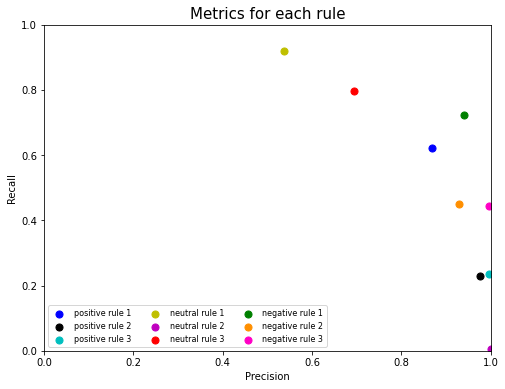

In [57]:
colors = ['b', 'k', 'c', 'y', 'm', 'r', 'g', '#FF8F00', '#FF00C5']

plt.figure(figsize=(8,6))

p1 = plt.scatter(precisions[0], recalls[0], s = 50, color = colors[0])
p2 = plt.scatter(precisions[1], recalls[1], s = 50, color = colors[1])
p3 = plt.scatter(precisions[2], recalls[2], s = 50, color = colors[2])
u1 = plt.scatter(precisions[3], recalls[3], s = 50, color = colors[3])
u2 = plt.scatter(precisions[4], recalls[4], s = 50, color = colors[4])
u3 = plt.scatter(precisions[5], recalls[5], s = 50, color = colors[5])
n1 = plt.scatter(precisions[6], recalls[6], s = 50, color = colors[6])
n2 = plt.scatter(precisions[7], recalls[7], s = 50, color = colors[7])
n3 = plt.scatter(precisions[8], recalls[8], s = 50, color = colors[8])
    
plt.legend((p1, p2, p3, u1, u2, u3, n1, n2, n3),
           (rules),
           scatterpoints = 1,
           loc = 'lower left',
           ncol = 3,
           fontsize = 8)
plt.title("Metrics for each rule", fontsize = 15)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()